In [1]:
import pandas as pd
import numpy as np

In [10]:
from sklearn.datasets import load_digits
from collections import Counter

In [3]:
dataset=load_digits()

In [6]:
x=dataset.data

In [7]:
x.shape

(1797, 64)

In [8]:
y=dataset.target

In [9]:
y.shape

(1797,)

In [11]:
Counter(y)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

<Figure size 432x288 with 0 Axes>

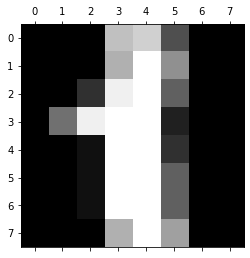

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.gray()
plt.matshow(x[1].reshape(8,8))

In [17]:
data=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [18]:
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss=StandardScaler()

In [23]:
data1=ss.fit_transform(data)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(data1,y,test_size=0.20)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model1=LogisticRegression()

In [32]:
model1.fit(xtrain,ytrain)

LogisticRegression()

In [33]:
model1.score(xtest,ytest)

0.9805555555555555

In [34]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
data_pca=pca.fit_transform(data)

In [35]:
data.shape

(1797, 64)

In [36]:
data_pca.shape

(1797, 29)

In [38]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [40]:
pca.n_components_

29

In [41]:
pxtrain,pxtest,pytrain,pytest=train_test_split(data_pca,y)

In [47]:
model2=LogisticRegression(max_iter=100)
import warnings
warnings.filterwarnings("ignore")

In [48]:
model2.fit(pxtrain,pytrain)

LogisticRegression()

In [49]:
model2.score(pxtest,pytest)

0.9555555555555556

# Excersice

In [50]:
edataset=pd.read_csv(r"C:\Users\ggomare\Downloads\heart.csv")

In [51]:
edataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [53]:
edataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [54]:
edataset.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [57]:
edataset["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [58]:
xe=edataset.drop(columns=["HeartDisease"])

In [61]:
xe.Sex.replace({
    'M':0,
    'F':1
},inplace=True)

In [63]:
xe.ExerciseAngina.replace({
    'Y':1,
    'N':0
},inplace=True)

In [65]:
xe.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [69]:
xe.RestingECG.replace({
   'Normal':1, 
    'ST':2, 
    'LVH':3 
},inplace=True)

In [70]:
xe

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,ATA,140,289,0,1,172,0,0.0,Up
1,49,1,NAP,160,180,0,1,156,0,1.0,Flat
2,37,0,ATA,130,283,0,2,98,0,0.0,Up
3,48,1,ASY,138,214,0,1,108,1,1.5,Flat
4,54,0,NAP,150,195,0,1,122,0,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,1,132,0,1.2,Flat
914,68,0,ASY,144,193,1,1,141,0,3.4,Flat
915,57,0,ASY,130,131,0,1,115,1,1.2,Flat
916,57,1,ATA,130,236,0,3,174,0,0.0,Flat


In [72]:
xe.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [73]:
xe.replace({
   'Up':1, 
   'Flat':2,
    'Down':3 
},inplace=True)

In [74]:
xe

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,ATA,140,289,0,1,172,0,0.0,1
1,49,1,NAP,160,180,0,1,156,0,1.0,2
2,37,0,ATA,130,283,0,2,98,0,0.0,1
3,48,1,ASY,138,214,0,1,108,1,1.5,2
4,54,0,NAP,150,195,0,1,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,1,132,0,1.2,2
914,68,0,ASY,144,193,1,1,141,0,3.4,2
915,57,0,ASY,130,131,0,1,115,1,1.2,2
916,57,1,ATA,130,236,0,3,174,0,0.0,2


In [76]:
xe.ChestPainType.replace({
    'ATA':1,
    'NAP':2,
    'ASY':3,
    'TA':4
},inplace=True)

In [77]:
xe

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,1,140,289,0,1,172,0,0.0,1
1,49,1,2,160,180,0,1,156,0,1.0,2
2,37,0,1,130,283,0,2,98,0,0.0,1
3,48,1,3,138,214,0,1,108,1,1.5,2
4,54,0,2,150,195,0,1,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,4,110,264,0,1,132,0,1.2,2
914,68,0,3,144,193,1,1,141,0,3.4,2
915,57,0,3,130,131,0,1,115,1,1.2,2
916,57,1,1,130,236,0,3,174,0,0.0,2


In [78]:
ye=edataset["HeartDisease"]

In [84]:
extrain,extest,eytrain,eytest=train_test_split(xe,ye,test_size=0.20)

In [113]:
from sklearn.ensemble import RandomForestClassifier
emodel1=RandomForestClassifier()

In [114]:
emodel1.fit(extrain,eytrain)

RandomForestClassifier()

In [115]:
emodel1.score(extest,eytest)

0.8532608695652174

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler=StandardScaler()

In [94]:
xe_standardization=scaler.fit_transform(xe)

In [96]:
sxtrain,sxtest,sytrain,sytest=train_test_split(xe_standardization,ye,test_size=0.20)

In [97]:
smodel1=LogisticRegression()

In [98]:
smodel1.fit(sxtrain,sytrain)

LogisticRegression()

In [99]:
smodel1.score(sxtest,sytest)

0.8641304347826086

In [104]:
pcae=PCA(0.95)
xe_pcae=pcae.fit_transform(xe)

In [107]:
pextrain,pextest,peytrain,peytest=train_test_split(xe_pcae,ye,test_size=0.20)

In [116]:
pemodel1=RandomForestClassifier()

In [117]:
pemodel1.fit(pextrain,peytrain)

RandomForestClassifier()

In [118]:
pemodel1.score(pextest,peytest)

0.6847826086956522

In [121]:
pcae.explained_variance_ratio_

array([0.92021411, 0.04913085])

In [123]:
pcae.n_components_

2